## Session 3: Pandas

In [330]:
import numpy as np
import pandas as pd

In [331]:
# Set path

path = r'https://raw.githubusercontent.com/worldbank/Python-for-Data-Science/master/June_2021_ETEC/day_2/data/data_edu.csv'

In [332]:
# Read data from csv file into dataframe

df = pd.read_csv(path, encoding = 'utf_8')

### Data Exploration

In [104]:
# Check dataframe shape: (# of observations, # of columns)

df.shape

(50397, 18)

In [333]:
# Inspect the first two rows of dataframe

df.head(2)

,country_id,country,country_school_id,country_student_id,student_gender,computer_at_home,internet_at_home,immigration_status,early_education,repeated_grades,school_location,school_type,school_size,class_size,socioeconomic_index,math_score,reading_score,parent_education
0,Argentina,Argentina,3200001,3213049,Female,No,Yes,First-Generation,Attended ECEC for at least two but less than t...,Repeated a grade,A city (100 000 to about 1 000 000 people),Public,570,31-35 students,-1.3730,314.25031,424.07239,"Post secondary, non-tertiary"
1,Argentina,Argentina,3200001,3203374,Female,Yes,Yes,Native,Attended ECEC for at least two but less than t...,Did not repeat a grade,A city (100 000 to about 1 000 000 people),Public,570,31-35 students,-1.1825,356.07629,380.26309,"Post secondary, non-tertiary"


In [334]:
# Inspect dataframe columns

df.columns

Index(['country_id', 'country', 'country_school_id', 'country_student_id',
       'student_gender', 'computer_at_home', 'internet_at_home',
       'immigration_status', 'early_education', 'repeated_grades',
       'school_location', 'school_type', 'school_size', 'class_size',
       'socioeconomic_index', 'math_score', 'reading_score',
       'parent_education'],
      dtype='object')

In [383]:
# Can also subset dataframe by relevant columns

list_of_relevant_columns = ["country", "school_type", "reading_score", "math_score"]

df[list_of_relevant_columns]

,country,school_type,reading_score,math_score
0,Argentina,Public,424.07239,314.25031
1,Argentina,Public,380.26309,356.07629
2,Argentina,Public,384.89191,338.08029
3,Argentina,Public,392.88031,310.38690
4,Argentina,Public,452.03439,397.42441
...,...,...,...,...
50392,United States,Public,571.73859,543.91510
50393,United States,Public,632.34979,517.25360
50394,United States,Public,638.23328,579.05408
50395,United States,Public,339.23511,302.05261


In [105]:
# Get a quick overview of the dataframe (columns, missing values, data types)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50397 entries, 0 to 50396
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country_id           50397 non-null  object 
 1   country              50397 non-null  object 
 2   country_school_id    50397 non-null  int64  
 3   country_student_id   50397 non-null  int64  
 4   student_gender       50397 non-null  object 
 5   computer_at_home     49965 non-null  object 
 6   internet_at_home     49965 non-null  object 
 7   immigration_status   50397 non-null  object 
 8   early_education      50397 non-null  object 
 9   repeated_grades      50397 non-null  object 
 10  school_location      49511 non-null  object 
 11  school_type          50397 non-null  object 
 12  school_size          50397 non-null  object 
 13  class_size           49395 non-null  object 
 14  socioeconomic_index  49564 non-null  float64
 15  math_score           50397 non-null 

In [348]:
# Use square bracket notation to inspect a column 

df["math_score"].tail()

50392    543.91510
50393    517.25360
50394    579.05408
50395    302.05261
50396    525.31409
Name: math_score, dtype: float64

In [349]:
# Alternate method: using dot notation:

df.math_score[-5:]

50392    543.91510
50393    517.25360
50394    579.05408
50395    302.05261
50396    525.31409
Name: math_score, dtype: float64

In [350]:
# # Summarize select columns: 

df.math_score.mean()

469.53370103240275

In [351]:
# Alternately: 

df.math_score.describe()

count    50397.000000
mean       469.533701
std         96.473981
min        128.113910
25%        399.351590
50%        470.627810
75%        540.987120
max        797.783020
Name: math_score, dtype: float64

In [358]:
# Select a subset of the dataframe: i.e. values where a conditional statement is True

df[df.math_score>500].shape

(19692, 18)

In [360]:
# Similarly

df[df.math_score<=500].shape

(30705, 18)

In [374]:
# Together, the two subsets above make up the original dataframe

df.shape

(50397, 18)

In [356]:
# Check the unique number of values in a column (good for categorical data)

df.country.nunique()

8

In [118]:
# Check what those unique values are: 

df.country.unique()

array(['Argentina', 'Finland', 'Japan', 'Netherlands', 'New Zealand',
       'Norway', 'Romania', 'United States'], dtype=object)

In [119]:
df.school_type.unique()

array(['Public', 'Private Government-dependent', 'Private Independent',
       'No Response', 'Invalid'], dtype=object)

In [123]:
# For categorical variables, we can see how observations are distributed across different values: 

df.repeated_grades.value_counts()

Did not repeat a  grade    32399
No Response                13513
Repeated a  grade           4485
Name: repeated_grades, dtype: int64

In [357]:
# Alternately, : 

df.repeated_grades.value_counts(normalize = True)

Did not repeat a  grade    0.642876
No Response                0.268131
Repeated a  grade          0.088993
Name: repeated_grades, dtype: float64

<AxesSubplot:ylabel='Frequency'>

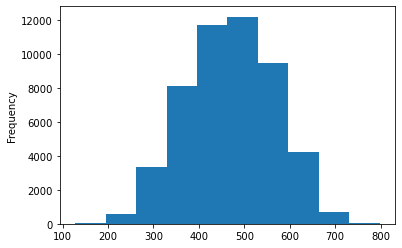

In [125]:
# Call matplotlib from pandas

# Check how math scores are distributed

df.math_score.plot(kind="hist")

<AxesSubplot:>

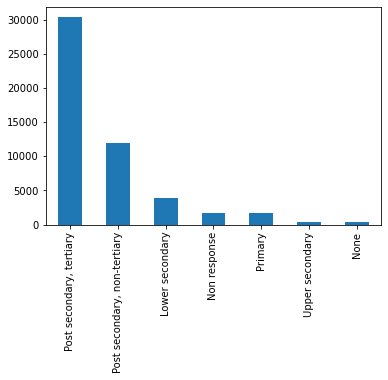

In [126]:
# Bar graph for levels of parent education

df.parent_education.value_counts().plot(kind = 'bar')

In [375]:
# Create new dataframe (subset of df) based on condition

df_japan = df[df.country=="Japan"]
df_japan.shape

(6109, 18)

<AxesSubplot:ylabel='school_type'>

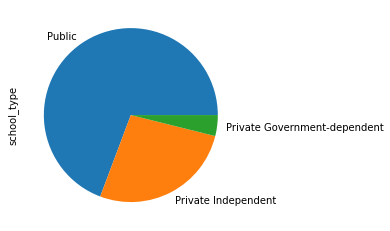

In [368]:
df_japan.school_type.value_counts().plot(kind = 'pie')

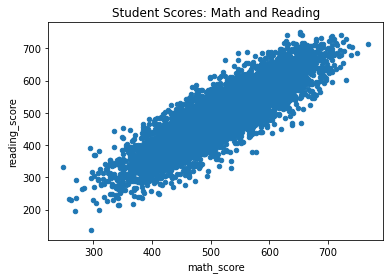

In [369]:
df_japan.plot(x = 'math_score', y = 'reading_score', kind = 'scatter', title = 'Student Scores: Math and Reading');

### Sample Lab

In [246]:
# 1. Find out the highest and lowest math_scores globally

max_math_score = df.math_score.max()
min_math_score = df.math_score.min()

print("Maximum Math Score Globally:", 
      max_math_score,
      "\nMinimum Math Score Globally:", 
      min_math_score)

Maximum Math Score Globally: 797.78302 
Minimum Math Score Globally: 128.11391


In [247]:
# 2. Find out the highest and lowest reading_score Globally

max_reading_score = df.reading_score.max()
min_reading_score = df.reading_score.min()

print("Maximum Reading Score Globally:", 
      max_reading_score,
      "\nMinimum Reading Score Globally:", 
      min_reading_score)

Maximum Reading Score Globally: 810.48743 
Minimum Reading Score Globally: 79.250099


In [251]:
# 3. Find out the highest and lowest math_score for students in Japan
max_math_score_japan = df[df.country=="Japan"].math_score.max()
min_math_score_japan = df[df.country=="Japan"].math_score.min()

print("Maximum Math Score in Japan:", 
      max_math_score_japan,
      "\nMinimum Math Score in Japan:", 
      min_math_score_japan)

Maximum Math Score in Japan: 768.0210000000001 
Minimum Math Score in Japan: 248.82249


In [259]:
# 4. Which student (unique observation) has the highest math score among female student? Which country is this student from?

df[df.student_gender=="Female"].loc[df[df.student_gender=="Female"].math_score.idxmax(),:]

country_id                                           New Zealand
country                                              New Zealand
country_school_id                                       55400085
country_student_id                                      55403875
student_gender                                            Female
computer_at_home                                            True
internet_at_home                                            True
immigration_status                             Second-Generation
early_education                                      No Response
repeated_grades                          Did not repeat a  grade
school_location        A large city (with over 1 000 000 people)
school_type                                  Private Independent
school_size                                                  NaN
class_size                                        21-25 students
socioeconomic_index                                       1.7182
math_score               

In [283]:
# 5. What is the mean and standard deviation of reading score for students in the United States


print("Mean reading score in the United States =", 
      df[df.country=="United States"].reading_score.mean(),
      "\nStandard deviation of reading scores in the United States =",
      df[df.country=="United States"].reading_score.std())

Mean reading score in the United States = 500.5676861967755 
Standard deviation of reading scores in the United States = 104.97531391496908


In [276]:
# 6. What percentage of students are male? Round the answer to four decimal places.

df.student_gender.value_counts(normalize=True)[1].round(4)

0.4978

In [290]:
# 7. Among students in Finland, what is the share of students who scored higher than or equal to 500 in maths?

fin_above_500 = df[(df.country=="Finland")&(df.math_score>=500)].shape[0]

print("Share of Finnish students who scored higher than or equal to 500 in math = ", fin_above_500 / df[df.country=="Finland"].shape[0])


Share of Finnish students who scored higher than or equal to 500 in math =  0.5593910426624181


In [293]:
# 7. Is it true that median reading scores are higher after omitting students whose socioeconomic_index is listed as null? 
# Hint: Calculate median reading_score with and without omitting null values for socioeconomic status 

df.reading_score.median()

477.10250999999994

In [294]:
df[df.socioeconomic_index.notna()].reading_score.median()

478.122205

In [298]:
# 8. What school_type do a majority of students belong to? 

df.school_type.value_counts()

Public                          34218
Private Government-dependent     6000
Invalid                          5813
Private Independent              3359
No Response                      1007
Name: school_type, dtype: int64

In [302]:
# 9. Which variable can be used as a unique student identifier? How do we know? 

df.country_student_id.nunique()==df.shape[0]

True

In [303]:
for column in df.columns:
    print("Column", column, "has", df[column].nunique(), "unique values")

Column country_id has 8 unique values
Column country has 8 unique values
Column country_school_id has 1785 unique values
Column country_student_id has 50397 unique values
Column student_gender has 2 unique values
Column computer_at_home has 2 unique values
Column internet_at_home has 2 unique values
Column immigration_status has 5 unique values
Column early_education has 10 unique values
Column repeated_grades has 3 unique values
Column school_location has 7 unique values
Column school_type has 5 unique values
Column school_size has 861 unique values
Column class_size has 11 unique values
Column socioeconomic_index has 27933 unique values
Column math_score has 50037 unique values
Column reading_score has 50082 unique values
Column parent_education has 7 unique values
Column is_female has 2 unique values


In [308]:
# 10. How many schools only have one student represented? How many have less than 10? 

df.country_school_id.value_counts()[df.country_school_id.value_counts()==1].shape[0]

14

In [309]:
df.country_school_id.value_counts()[df.country_school_id.value_counts()>1].shape[0]

1771

In [311]:
df.country_school_id.value_counts()[df.country_school_id.value_counts()<10].shape[0]

96

In [ ]:
# 11. How ould you omit observations if country_school_id has less than 10 students represented? 

In [314]:
# 12. How many unique schools are represented from Argentina? From Japan? 

df[df.country=="Argentina"].country_school_id.nunique()

455

In [315]:

df[df.country=="Japan"].country_school_id.nunique()

183

In [385]:
### Visualization questions for lab

### Further Exploration and Data Wrangling + Seaborn

In [341]:
# How are observations are distributed across country and student_gender?

pd.crosstab(df.country, df.student_gender)

student_gender,Female,Male
country,,
Argentina,6232,5743
Finland,2772,2877
Japan,3120,2989
Netherlands,2330,2435
New Zealand,3154,3019
Norway,2880,2933
Romania,2444,2631
United States,2376,2462


In [338]:
# Explore how observations are distributed across country and parent_education levels
# Show category totals under "All"

pd.crosstab(df.country, df.parent_education, margins = True)

parent_education,Lower secondary,Non response,None,"Post secondary, non-tertiary","Post secondary, tertiary",Primary,Upper secondary,All
country,,,,,,,,
Argentina,1798,526,226,2380,5731,1314,0,11975
Finland,72,130,21,1006,4397,23,0,5649
Japan,84,101,0,1765,4016,0,143,6109
Netherlands,161,149,56,1282,3050,67,0,4765
New Zealand,1104,399,27,1137,3449,57,0,6173
Norway,107,306,27,1054,4130,22,167,5813
Romania,221,44,16,2026,2514,129,125,5075
United States,278,80,40,1275,3090,75,0,4838
All,3825,1735,413,11925,30377,1687,435,50397


In [339]:
# Explore how observations are distributed across country and parent_education levels: 
# In Percentages

pd.crosstab(df.country, df.parent_education, normalize= True, margins=True)

parent_education,Lower secondary,Non response,None,"Post secondary, non-tertiary","Post secondary, tertiary",Primary,Upper secondary,All
country,,,,,,,,
Argentina,0.035677,0.010437,0.004484,0.047225,0.113717,0.026073,0.000000,0.237613
Finland,0.001429,0.002580,0.000417,0.019962,0.087247,0.000456,0.000000,0.112090
Japan,0.001667,0.002004,0.000000,0.035022,0.079687,0.000000,0.002837,0.121218
Netherlands,0.003195,0.002957,0.001111,0.025438,0.060519,0.001329,0.000000,0.094549
New Zealand,0.021906,0.007917,0.000536,0.022561,0.068437,0.001131,0.000000,0.122487
Norway,0.002123,0.006072,0.000536,0.020914,0.081949,0.000437,0.003314,0.115344
Romania,0.004385,0.000873,0.000317,0.040201,0.049884,0.002560,0.002480,0.100700
United States,0.005516,0.001587,0.000794,0.025299,0.061313,0.001488,0.000000,0.095998
All,0.075897,0.034427,0.008195,0.236621,0.602754,0.033474,0.008631,1.000000


In [110]:
# Creating a new variable

df["is_female"] = df.student_gender.apply(lambda x: True if x=="Female" else False)

In [111]:
# Change school_size to integer if value isn't "No Response" or "Invalid", else assign None

df["school_size"] = df["school_size"].apply(lambda x: int(x) if x!="No Response" and x!="Invalid" else None)

In [131]:
df["computer_at_home"] = df.computer_at_home.apply(lambda x: True if x=="Yes" else False)
df["internet_at_home"] = df.internet_at_home.apply(lambda x: True if x=="Yes" else False)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='country', ylabel='math_score'>

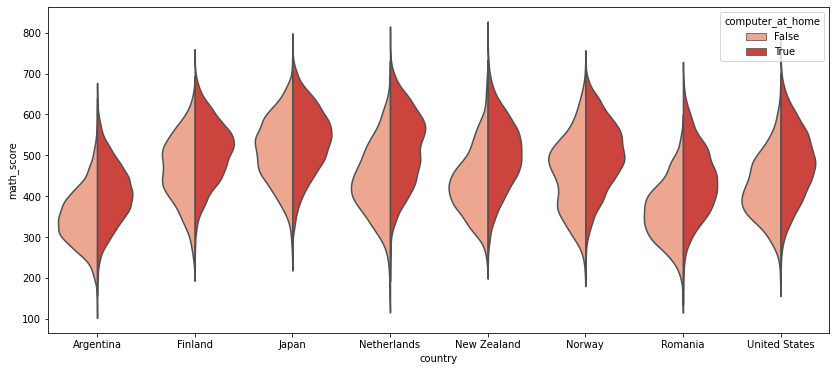

In [132]:
# violinplot
f, ax = plt.subplots(figsize=(14, 6))

sns.violinplot(x="country", 
               y="math_score", 
               hue = 'computer_at_home',
               data = df, 
               palette = "Reds",
               split = True,
               inner = None) # or, None, or "box", or "quartile"


<AxesSubplot:xlabel='immigration_status', ylabel='reading_score'>

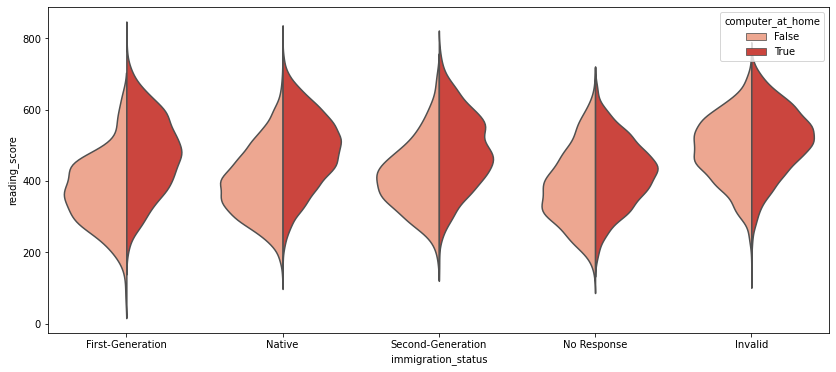

In [133]:
# violinplot
f, ax = plt.subplots(figsize=(14, 6))

sns.violinplot(x="immigration_status", 
               y="reading_score", 
               hue = 'computer_at_home',
               data = df, 
               palette = "Reds",
               split = True,
               inner = None) # or, None, or "box", or "quartile"


<AxesSubplot:xlabel='socioeconomic_index', ylabel='math_score'>

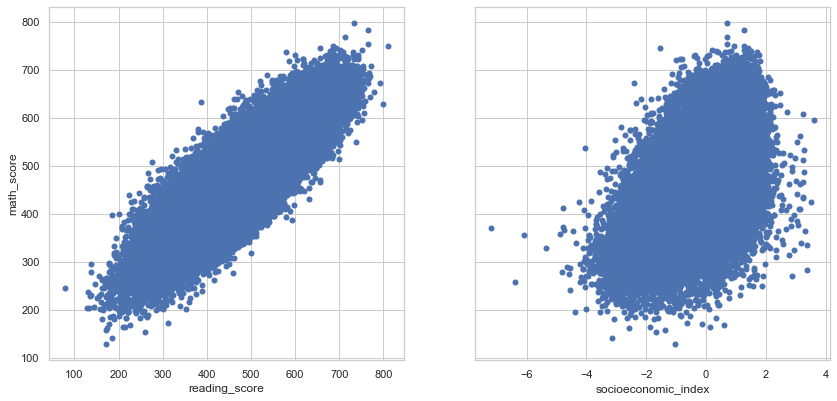

In [79]:
# scatterplot

sns.set(style="whitegrid")

f, (ax1, ax2) = plt.subplots(1,2,figsize=(14, 6.5),sharey=True)

sns.scatterplot(x="reading_score", 
                y="math_score",
                palette="Blues",
                linewidth=0,
                data=df, 
                ax=ax1)

sns.scatterplot(x="socioeconomic_index", #x ='school_size' 
                y="math_score",
                palette="Blues",
                linewidth=0,
                data=df, 
                ax=ax2)

### Merging dataframes + API access

In [184]:
import requests
import json
import wbgapi as wbg

In [185]:
# !pip install wbgapi

In [197]:
# Get data on GDP per capita from the World Development Indicators API:

df_gdp_pc = wbg.data.DataFrame(series=['NY.GDP.PCAP.CD'], mrv=2)

df_gdp_pc = df_gdp_pc.reset_index()

# Also, for total population by country: df_pop = wbg.data.DataFrame(series=['SP.POP.TOTL'], mrv=3)

In [198]:
# Examine the first five observations

df_gdp_pc.head()

,economy,YR2018,YR2019
0,ABW,NaN,NaN
1,AFG,493.750418,507.103432
2,AGO,3289.646664,2790.726615
3,ALB,5284.380184,5353.244856
4,AND,41793.055258,40886.391165


In [199]:
# Get dataset to link iso3 codes to country names from World Bank's API

iso_codes = requests.get("http://api.worldbank.org/v2/country/?per_page=300", params ={"format":"json"})

In [200]:
df_codes = pd.DataFrame(json.loads(iso_codes.text)[1])

df_codes.head()

,id,iso2Code,name,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,latitude
0,ABW,AW,Aruba,"{'id': 'LCN', 'iso2code': 'ZJ', 'value': 'Lati...","{'id': '', 'iso2code': '', 'value': ''}","{'id': 'HIC', 'iso2code': 'XD', 'value': 'High...","{'id': 'LNX', 'iso2code': 'XX', 'value': 'Not ...",Oranjestad,-70.0167,12.5167
1,AFG,AF,Afghanistan,"{'id': 'SAS', 'iso2code': '8S', 'value': 'Sout...","{'id': 'SAS', 'iso2code': '8S', 'value': 'Sout...","{'id': 'LIC', 'iso2code': 'XM', 'value': 'Low ...","{'id': 'IDX', 'iso2code': 'XI', 'value': 'IDA'}",Kabul,69.1761,34.5228
2,AFR,A9,Africa,"{'id': 'NA', 'iso2code': 'NA', 'value': 'Aggre...","{'id': '', 'iso2code': '', 'value': ''}","{'id': 'NA', 'iso2code': 'NA', 'value': 'Aggre...","{'id': '', 'iso2code': '', 'value': 'Aggregates'}",,,
3,AGO,AO,Angola,"{'id': 'SSF', 'iso2code': 'ZG', 'value': 'Sub-...","{'id': 'SSA', 'iso2code': 'ZF', 'value': 'Sub-...","{'id': 'LMC', 'iso2code': 'XN', 'value': 'Lowe...","{'id': 'IBD', 'iso2code': 'XF', 'value': 'IBRD'}",Luanda,13.242,-8.81155
4,ALB,AL,Albania,"{'id': 'ECS', 'iso2code': 'Z7', 'value': 'Euro...","{'id': 'ECA', 'iso2code': '7E', 'value': 'Euro...","{'id': 'UMC', 'iso2code': 'XT', 'value': 'Uppe...","{'id': 'IBD', 'iso2code': 'XF', 'value': 'IBRD'}",Tirane,19.8172,41.3317


In [201]:


# countries_list = df.country.unique().tolist()

In [202]:
## Subset iso codes dataframe for only those countries we are interested in; and select relevant columns
# df_codes2 = df_codes[df_codes.name.isin(countries_list)]

In [204]:
df_codes2 = df_codes[["id", "iso2Code", "name", "capitalCity","longitude", "latitude"]]

In [205]:
# Link GDP per capita to country names

In [207]:
# Rename 'id' column to 'economy'
df_codes2 = df_codes2.rename(columns={"id":"economy"})
df_codes2

,economy,iso2Code,name,capitalCity,longitude,latitude
0,ABW,AW,Aruba,Oranjestad,-70.0167,12.5167
1,AFG,AF,Afghanistan,Kabul,69.1761,34.5228
2,AFR,A9,Africa,,,
3,AGO,AO,Angola,Luanda,13.242,-8.81155
4,ALB,AL,Albania,Tirane,19.8172,41.3317
...,...,...,...,...,...,...
292,XZN,A5,Sub-Saharan Africa excluding South Africa and ...,,,
293,YEM,YE,"Yemen, Rep.",Sana'a,44.2075,15.352
294,ZAF,ZA,South Africa,Pretoria,28.1871,-25.746
295,ZMB,ZM,Zambia,Lusaka,28.2937,-15.3982


In [208]:
df_gdp_pc2 = pd.merge(df_codes2, df_gdp_pc, on="economy", how="left")
df_gdp_pc2

,economy,iso2Code,name,capitalCity,longitude,latitude,YR2018,YR2019
0,ABW,AW,Aruba,Oranjestad,-70.0167,12.5167,NaN,NaN
1,AFG,AF,Afghanistan,Kabul,69.1761,34.5228,493.750418,507.103432
2,AFR,A9,Africa,,,,NaN,NaN
3,AGO,AO,Angola,Luanda,13.242,-8.81155,3289.646664,2790.726615
4,ALB,AL,Albania,Tirane,19.8172,41.3317,5284.380184,5353.244856
...,...,...,...,...,...,...,...,...
292,XZN,A5,Sub-Saharan Africa excluding South Africa and ...,,,,NaN,NaN
293,YEM,YE,"Yemen, Rep.",Sana'a,44.2075,15.352,824.117629,774.334490
294,ZAF,ZA,South Africa,Pretoria,28.1871,-25.746,6372.605655,6001.401121
295,ZMB,ZM,Zambia,Lusaka,28.2937,-15.3982,1516.390661,1305.063254


In [209]:
# Rename columns in df_gdp_pc2 dataframe
df_gdp_pc2.rename(columns={"YR2018":"gdp_pc_2018", 
                                      "YR2019":"gdp_pc_2019", 
                                      "economy":"iso3Code",
                                       "name":"country"}, inplace=True)
df_gdp_pc2

,iso3Code,iso2Code,country,capitalCity,longitude,latitude,gdp_pc_2018,gdp_pc_2019
0,ABW,AW,Aruba,Oranjestad,-70.0167,12.5167,NaN,NaN
1,AFG,AF,Afghanistan,Kabul,69.1761,34.5228,493.750418,507.103432
2,AFR,A9,Africa,,,,NaN,NaN
3,AGO,AO,Angola,Luanda,13.242,-8.81155,3289.646664,2790.726615
4,ALB,AL,Albania,Tirane,19.8172,41.3317,5284.380184,5353.244856
...,...,...,...,...,...,...,...,...
292,XZN,A5,Sub-Saharan Africa excluding South Africa and ...,,,,NaN,NaN
293,YEM,YE,"Yemen, Rep.",Sana'a,44.2075,15.352,824.117629,774.334490
294,ZAF,ZA,South Africa,Pretoria,28.1871,-25.746,6372.605655,6001.401121
295,ZMB,ZM,Zambia,Lusaka,28.2937,-15.3982,1516.390661,1305.063254


In [210]:
df_country_m_f = df.groupby(["country", "student_gender"])[["math_score","reading_score"]].median().reset_index()

In [211]:
df_country_m_f

,country,student_gender,math_score,reading_score
0,Argentina,Female,379.999605,423.397460
1,Argentina,Male,400.012300,409.711000
2,Finland,Female,515.323700,553.570130
3,Finland,Male,507.821010,500.784910
4,Japan,Female,525.601345,515.985595
5,Japan,Male,536.411990,499.877410
6,Netherlands,Female,518.592620,497.670090
7,Netherlands,Male,517.775330,464.479310
8,New Zealand,Female,492.636595,527.040530
9,New Zealand,Male,502.882290,499.501190


In [212]:
df_combined = pd.merge(df_gdp_pc2, df_country_m_f, on="country", how = "right" )

In [213]:
df_combined

,iso3Code,iso2Code,country,capitalCity,longitude,latitude,gdp_pc_2018,gdp_pc_2019,student_gender,math_score,reading_score
0,ARG,AR,Argentina,Buenos Aires,-58.4173,-34.6118,11633.498009,9912.281809,Female,379.999605,423.397460
1,ARG,AR,Argentina,Buenos Aires,-58.4173,-34.6118,11633.498009,9912.281809,Male,400.012300,409.711000
2,FIN,FI,Finland,Helsinki,24.9525,60.1608,50030.877311,48771.373796,Female,515.323700,553.570130
3,FIN,FI,Finland,Helsinki,24.9525,60.1608,50030.877311,48771.373796,Male,507.821010,500.784910
4,JPN,JP,Japan,Tokyo,139.77,35.67,39159.423563,40246.880128,Female,525.601345,515.985595
5,JPN,JP,Japan,Tokyo,139.77,35.67,39159.423563,40246.880128,Male,536.411990,499.877410
6,NLD,NL,Netherlands,Amsterdam,4.89095,52.3738,53044.532435,52295.039050,Female,518.592620,497.670090
7,NLD,NL,Netherlands,Amsterdam,4.89095,52.3738,53044.532435,52295.039050,Male,517.775330,464.479310
8,NZL,NZ,New Zealand,Wellington,174.776,-41.2865,42427.583145,41557.802411,Female,492.636595,527.040530
9,NZL,NZ,New Zealand,Wellington,174.776,-41.2865,42427.583145,41557.802411,Male,502.882290,499.501190


<AxesSubplot:xlabel='country', ylabel='math_score'>

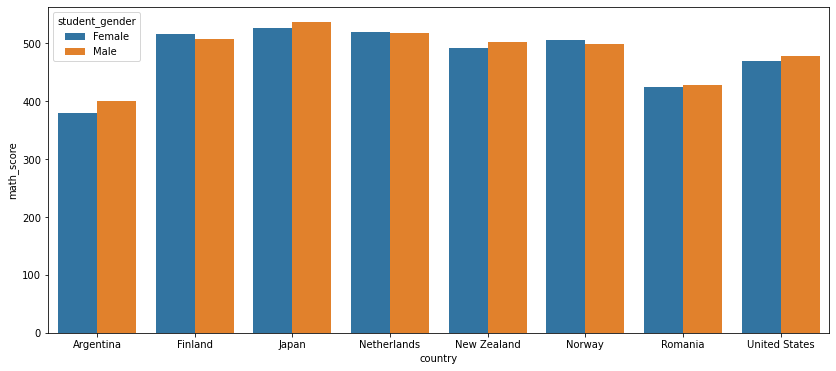

In [214]:
# bar chart
f, ax = plt.subplots(figsize=(14, 6))

sns.barplot(x="country", 
               y="math_score", 
               hue = 'student_gender',
               data = df_combined)

<AxesSubplot:xlabel='country', ylabel='reading_score'>

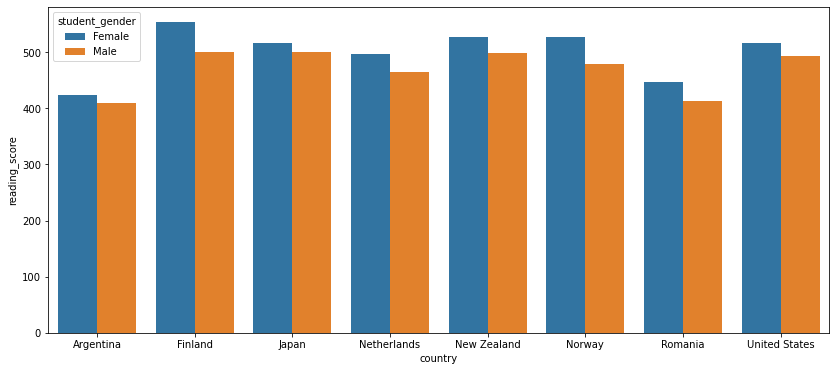

In [215]:
# bar chart
f, ax = plt.subplots(figsize=(14, 6))

sns.barplot(x="country", 
               y="reading_score", 
               hue = 'student_gender',
               data = df_combined)

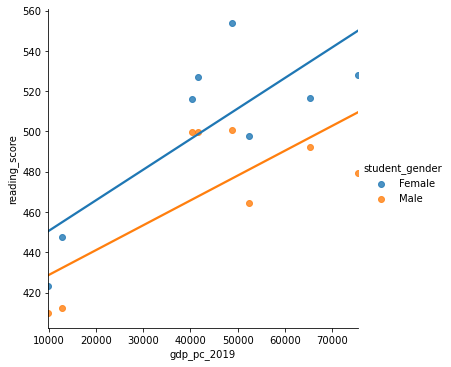

In [158]:
sns.lmplot(x="gdp_pc_2019", y="reading_score", data=df_combined, hue="student_gender", ci=None)

plt.savefig('scatter', dpi=400, bbox_inches='tight')

In [166]:
df_alt = df.copy()

print('original shape: ', df.shape)
df_alt.dropna(inplace=True)
print('new shape: ', df_alt.shape)

original shape:  (50397, 19)
new shape:  (35768, 19)


In [167]:
df.shape

(50397, 19)

In [174]:
df.duplicated("country_school_id", keep=False).value_counts()

True     50383
False       14
dtype: int64

In [176]:
df.duplicated("country_school_id", keep="first").value_counts()

True     48612
False     1785
dtype: int64

In [181]:
df.country_school_id.value_counts()

55400029    71
55400194    69
55400069    65
55400176    65
55400105    65
            ..
84000006     1
3200270      1
3200412      1
3200318      1
24600098     1
Name: country_school_id, Length: 1785, dtype: int64

In [182]:
df.country_school_id.nunique()

1785

In [171]:
df.columns

Index(['country_id', 'country', 'country_school_id', 'country_student_id',
       'student_gender', 'computer_at_home', 'internet_at_home',
       'immigration_status', 'early_education', 'repeated_grades',
       'school_location', 'school_type', 'school_size', 'class_size',
       'socioeconomic_index', 'math_score', 'reading_score',
       'parent_education', 'is_female'],
      dtype='object')

In [ ]:
# To save: 
# df_combined.to_csv("pisa_with_wdi.csv")